In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np
import scipy.special as ss
from datetime import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
def GARCH_t(Y):
 "Initialize Params:"
 mu = param0[0]
 omega = param0[1]
 alpha = param0[2]
 beta = param0[3]
 nv = param0[4]
 
 T = Y.shape[0]
 GARCH_t = np.zeros(T) 
 sigma2 = np.zeros(T)   
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.standard_t(nv,1)
    v[t] = sigma2[t]
    GARCH_t[t] = np.log(ss.gamma((nv+1)/2))-np.log(np.sqrt(nv*np.pi))-\
                    np.log(ss.gamma(nv/2))-((nv+1)/2)*np.log(1+((F[t]**2)/v[t])/nv)     
    Likelihood = np.sum(GARCH_t[1:-1])  
    return Likelihood

In [ ]:
def GARCH_PROD_t(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 nv = params[4]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.0001
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.standard_t(nv,1) 
 return Y  

[*********************100%***********************]  1 of 1 completed
         Current function value: nan
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: OptimizeWarning: Unknown solver options: xtol
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


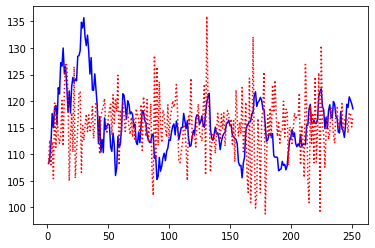

In [ ]:
start_date = datetime(2021,1,1)
end_date = datetime(2021,12,31)
AAPL = yf.download('TSM',start_date,end_date)
Y = AAPL['Adj Close'].values
T = Y.shape[0];
param0 = np.array([np.mean(Y), np.std(Y)/2, 0.5, 0.5,1000])
param_star = minimize(GARCH_t, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH_t = GARCH_PROD_t(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH_t,'r:')